# PCA and Neural Network-Based Dimensionality Reduction  
## Human Activity Recognition Using Smartphones Dataset

In this project, we explore dimensionality reduction techniques for high-dimensional sensor data using both traditional linear methods and neural network-based approaches.

We first apply Principal Component Analysis (PCA) as a baseline linear technique to reduce the dimensionality of the Human Activity Recognition (HAR) dataset. PCA provides an interpretable low-dimensional representation by preserving directions of maximum variance.

Next, we implement a neural network-based autoencoder to perform non-linear dimensionality reduction. By comparing linear PCA and autoencoder-based representations, we analyze how neural networks capture complex structures in human activity data.

This project demonstrates skills in:
- High-dimensional data preprocessing
- Linear and non-linear dimensionality reduction
- Representation learning using neural networks
- Data visualization and interpretation


In [18]:
# Step 1 — Import Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


In [19]:
# Step 2 — Load the Dataset
# Dataset base path (Google Colab environment)
BASE_PATH = "/content/UCI HAR Dataset"

# Load training features
X_train = pd.read_csv(
    f"{BASE_PATH}/train/X_train.txt",
    delim_whitespace=True,
    header=None
)

# Load training labels
y_train = pd.read_csv(
    f"{BASE_PATH}/train/y_train.txt",
    delim_whitespace=True,
    header=None
)

print("Training feature shape:", X_train.shape)
print("Training label shape:", y_train.shape)


/tmp/ipython-input-649607331.py:6: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  X_train = pd.read_csv(


Training feature shape: (7352, 561)
Training label shape: (7352, 1)


/tmp/ipython-input-649607331.py:13: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  y_train = pd.read_csv(


In [20]:
# Step 3 — Feature Standardization
# Standardize features before PCA
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

print("Standardized feature shape:", X_train_scaled.shape)


Standardized feature shape: (7352, 561)


In [30]:
# Step 4 — Baseline PCA (Linear Dimensionality Reduction)
# Apply PCA to reduce dimensions to 2
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X_train_scaled)

print("Explained variance ratio per component:")
print(pca_2d.explained_variance_ratio_)

print("Total explained variance:")
print(pca_2d.explained_variance_ratio_.sum())


Explained variance ratio per component:
[0.50781172 0.0658068 ]
Total explained variance:
0.5736185255809917


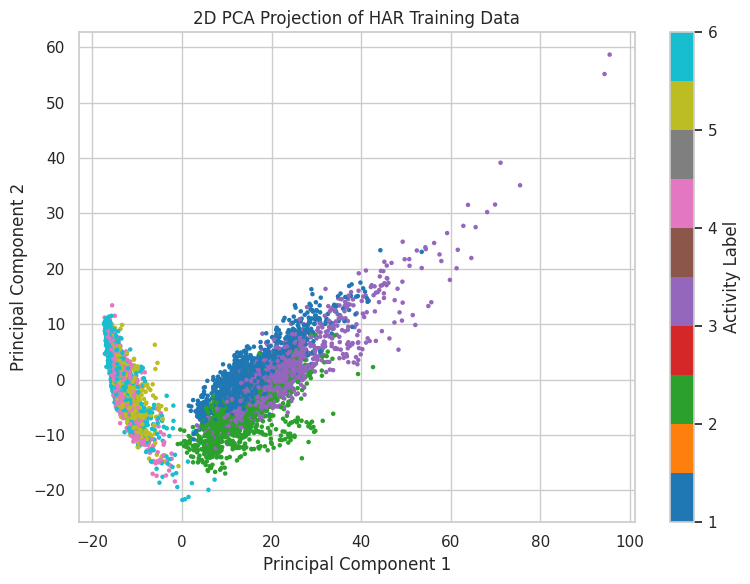

In [22]:
# Step 5 — PCA Visualization
plt.figure(figsize=(8, 6))
plt.scatter(
    X_pca_2d[:, 0],
    X_pca_2d[:, 1],
    c=y_train.values.ravel(),
    cmap="tab10",
    s=5
)

plt.colorbar(label="Activity Label")
plt.title("2D PCA Projection of HAR Training Data")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.tight_layout()
plt.show()


## Interpretation of PCA Results

The 2D PCA projection provides an overview of how different human activities are distributed in a low-dimensional space.

Some activities form relatively distinct clusters, while others show significant overlap. This behavior is expected because PCA is a linear method that captures global variance but may struggle to separate activities with similar motion patterns.

These limitations motivate the use of non-linear dimensionality reduction techniques, such as neural network-based autoencoders, which are explored in the next section.


In [23]:
# Step 7 — Autoencoder for Non-Linear PCA
'''
Objective:
Learn a non-linear low-dimensional representation of the HAR dataset using a neural network autoencoder and compare it with linear PCA.'''
#Step 7.1 — Import Neural Network Libraries
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam


In [24]:
# Step 7.2 — Define the Autoencoder Architecture
input_dim = X_train_scaled.shape[1]
encoding_dim = 2  # same as PCA for comparison

# Input layer
input_layer = Input(shape=(input_dim,))

# Encoder
encoded = Dense(128, activation="relu")(input_layer)
encoded = Dense(64, activation="relu")(encoded)
bottleneck = Dense(encoding_dim, activation="linear", name="bottleneck")(encoded)

# Decoder
decoded = Dense(64, activation="relu")(bottleneck)
decoded = Dense(128, activation="relu")(decoded)
output_layer = Dense(input_dim, activation="linear")(decoded)

# Autoencoder model
autoencoder = Model(inputs=input_layer, outputs=output_layer)

# Encoder model (for visualization)
encoder = Model(inputs=input_layer, outputs=bottleneck)

autoencoder.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 561)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        71,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bottleneck (Dense)              │ (None, 2)              │           130 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 561)            │        72,369 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 161,203 (629.70 KB)

 Trainable params: 161,203 (629.70 KB)

 Non-trainable params: 0 (0.00 B)

In [25]:
# Step 7.3 — Compile and Train the Autoencoder
autoencoder.compile(
    optimizer=Adam(learning_rate=0.001),
    loss="mse"
)

history = autoencoder.fit(
    X_train_scaled,
    X_train_scaled,
    epochs=30,
    batch_size=256,
    shuffle=True,
    validation_split=0.2,
    verbose=1
)


Epoch 1/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.9331 - val_loss: 0.4156
Epoch 2/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.4989 - val_loss: 0.3628
Epoch 3/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.4505 - val_loss: 0.3386
Epoch 4/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.4271 - val_loss: 0.3303
Epoch 5/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.4191 - val_loss: 0.3243
Epoch 6/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.4071 - val_loss: 0.3228
Epoch 7/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.4189 - val_loss: 0.3206
Epoch 8/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.4085 - val_loss: 0.3194
Epoch 9/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.3953 - val_loss: 0.3199
Epoch 10/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.3982 - val_loss: 0.3195
Epoch 11/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.4024 - val_loss: 0.3191
Epoch 12/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.3

In [26]:
# Step 7.4 — Extract Low-Dimensional Representation
X_encoded_2d = encoder.predict(X_train_scaled)

print("Encoded feature shape:", X_encoded_2d.shape)


230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Encoded feature shape: (7352, 2)


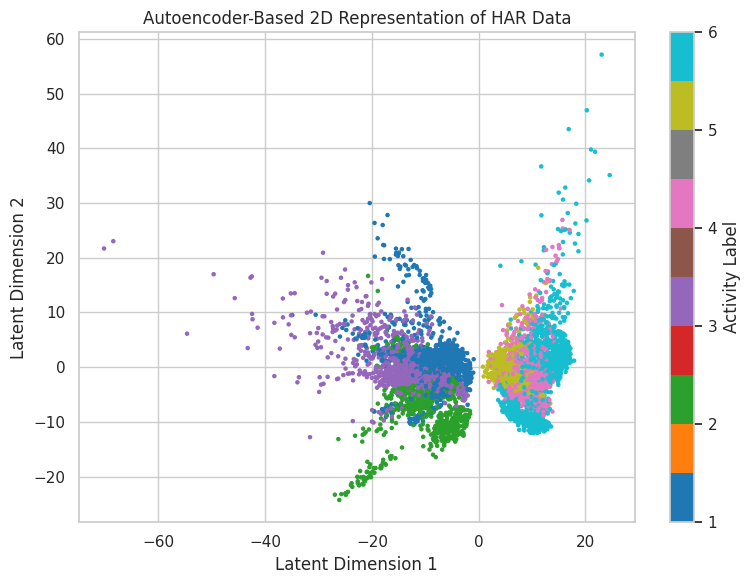

In [28]:
# Step 8 — Autoencoder Visualization (2D)
plt.figure(figsize=(8, 6))
plt.scatter(
    X_encoded_2d[:, 0],
    X_encoded_2d[:, 1],
    c=y_train.values.ravel(),
    cmap="tab10",
    s=5
)

plt.colorbar(label="Activity Label")
plt.title("Autoencoder-Based 2D Representation of HAR Data")
plt.xlabel("Latent Dimension 1")
plt.ylabel("Latent Dimension 2")
plt.tight_layout()
plt.show()


## Step 9 — Comparison with Linear PCA

The linear PCA projection captures the main directions of variance in the data but shows overlap between activities with similar motion patterns.

In contrast, the autoencoder learns a non-linear representation that improves separation between activity clusters. This demonstrates that human activity data contains non-linear structures that cannot be fully captured by linear PCA.



## Step 10 — Final Conclusion

In this project, we explored dimensionality reduction techniques on the Human Activity Recognition (HAR) dataset using both linear and non-linear approaches.

- **Linear PCA** provided a baseline 2D representation, capturing the main variance directions. While some activity clusters were distinguishable, significant overlap remained between activities with similar motion patterns.

- **Neural Network Autoencoder** allowed for non-linear dimensionality reduction, resulting in improved separation of activity clusters. This shows that autoencoders can capture complex, non-linear structures that PCA cannot, offering a more flexible and powerful approach to representation learning.

### Key Takeaways

1. PCA is simple, fast, and interpretable, suitable for quick analysis of linearly structured data.  
2. Autoencoders are more expressive, capable of learning non-linear patterns, but require careful training and validation.  
3. Non-linear relationships are important for human activity data, and neural network-based representations can provide better insights.

Overall, this project highlights the value of combining linear and non-linear dimensionality reduction techniques for high-dimensional data analysis. The results can be applied in areas such as activity recognition, wearable sensor analytics, and other applications involving complex sensor patterns.
